In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
#import missingno as msno

# matplotlib
from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# scipy specifics
from scipy import stats as sps
from scipy.interpolate import interp1d

In [4]:
try:
    from urllib.request import Request, urlopen  # Python 3
except ImportError:
    from urllib2 import Request, urlopen  # Python 2

req = Request('https://cloud.minsa.gob.pe/s/Y8w3wHsEdYQSZRp/download')
req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
content = urlopen(req)

test = pd.read_csv(content , sep=";", na_values='EN INVESTIGACIÓN')
print(test)

         FECHA_CORTE                              UUID DEPARTAMENTO  \
0           20210531  7320cabdc1aaca6c59014cae76a134e6       ANCASH   
1           20210531  c1f091ccef4b8a7d2095366e3a12e2c4   LAMBAYEQUE   
2           20210531  9de277f4682e69b204c1683ed8c6edbd       ANCASH   
3           20210531  c029d5394b7d54a6a20bd956674bf070   LAMBAYEQUE   
4           20210531  0041207e579b0ffc4e8bb8a083efb20d   LAMBAYEQUE   
...              ...                               ...          ...   
1961082     20210531  5ac08c40d8419e26ee678e296fff147b        CUSCO   
1961083     20210531  f77b56ea0006f32f66158363920e2b50        CUSCO   
1961084     20210531  5174190f88b9266cd2f0590004c74e50        CUSCO   
1961085     20210531  2b2e6e3bca7bb6837323b24ee7ae8435        CUSCO   
1961086     20210531  8473197a0df3f8b7439f06b15a79152c         PUNO   

             PROVINCIA        DISTRITO METODODX  EDAD       SEXO  \
0                SANTA  NUEVO CHIMBOTE       PR  41.0  MASCULINO   
1          

In [5]:
test.head(n=10)

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20210531,7320cabdc1aaca6c59014cae76a134e6,ANCASH,SANTA,NUEVO CHIMBOTE,PR,41.0,MASCULINO,20200822.0
1,20210531,c1f091ccef4b8a7d2095366e3a12e2c4,LAMBAYEQUE,CHICLAYO,CHICLAYO,PR,42.0,MASCULINO,20200822.0
2,20210531,9de277f4682e69b204c1683ed8c6edbd,ANCASH,HUARAZ,HUARAZ,PR,47.0,MASCULINO,20200822.0
3,20210531,c029d5394b7d54a6a20bd956674bf070,LAMBAYEQUE,CHICLAYO,CHICLAYO,PR,47.0,MASCULINO,20200821.0
4,20210531,0041207e579b0ffc4e8bb8a083efb20d,LAMBAYEQUE,CHICLAYO,CHICLAYO,PR,47.0,MASCULINO,20200821.0
5,20210531,42a30b9c8d709be224aa03deb5772618,LAMBAYEQUE,CHICLAYO,CHICLAYO,PR,49.0,MASCULINO,20200822.0
6,20210531,d2cc34836e2ca7f320ad6e75eb13f10c,PIURA,PIURA,CASTILLA,PR,31.0,MASCULINO,20200820.0
7,20210531,dedd5cd88d3ecf1037a7e42a2d6e938e,PIURA,PIURA,LA ARENA,PR,41.0,MASCULINO,20200824.0
8,20210531,43e9ad9ca61c8aa7d17f953c1e4e35c3,ANCASH,HUARAZ,HUARAZ,PR,30.0,MASCULINO,20200821.0
9,20210531,3a59c8abcca6d34080e50a7fb91aacd7,ANCASH,SANTA,CHIMBOTE,PR,32.0,MASCULINO,20200821.0


In [6]:
test['FECHA_RESULTADO'] = pd.to_datetime(test['FECHA_RESULTADO'].astype(str), format='%Y%m%d')
test

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20210531,7320cabdc1aaca6c59014cae76a134e6,ANCASH,SANTA,NUEVO CHIMBOTE,PR,41.0,MASCULINO,2020-08-22
1,20210531,c1f091ccef4b8a7d2095366e3a12e2c4,LAMBAYEQUE,CHICLAYO,CHICLAYO,PR,42.0,MASCULINO,2020-08-22
2,20210531,9de277f4682e69b204c1683ed8c6edbd,ANCASH,HUARAZ,HUARAZ,PR,47.0,MASCULINO,2020-08-22
3,20210531,c029d5394b7d54a6a20bd956674bf070,LAMBAYEQUE,CHICLAYO,CHICLAYO,PR,47.0,MASCULINO,2020-08-21
4,20210531,0041207e579b0ffc4e8bb8a083efb20d,LAMBAYEQUE,CHICLAYO,CHICLAYO,PR,47.0,MASCULINO,2020-08-21
...,...,...,...,...,...,...,...,...,...
1961082,20210531,5ac08c40d8419e26ee678e296fff147b,CUSCO,CUSCO,SANTIAGO,PCR,16.0,MASCULINO,2021-01-12
1961083,20210531,f77b56ea0006f32f66158363920e2b50,CUSCO,QUISPICANCHI,OROPESA,PCR,16.0,MASCULINO,2021-01-15
1961084,20210531,5174190f88b9266cd2f0590004c74e50,CUSCO,LA CONVENCION,SANTA ANA,PCR,17.0,MASCULINO,2021-01-15
1961085,20210531,2b2e6e3bca7bb6837323b24ee7ae8435,CUSCO,CHUMBIVILCAS,SANTO TOMAS,PCR,19.0,MASCULINO,2021-01-10


Ver si hay datos filas vacias

In [7]:
test['SEXO'].isnull().value_counts()

False    1961086
True           1
Name: SEXO, dtype: int64

In [8]:
test.isnull().sum()

FECHA_CORTE             0
UUID                    0
DEPARTAMENTO            0
PROVINCIA          101908
DISTRITO           101908
METODODX                0
EDAD                  344
SEXO                    1
FECHA_RESULTADO      2023
dtype: int64

In [9]:
poblacion_csv = pd.read_csv('poblacion_provincia.csv')
poblacion_csv

,UBIGEO,PROVINCIA,POBLACION
0,10100,CHACHAPOYAS,63188
1,10200,BAGUA,84672
2,10300,BONGARA,26830
3,10400,CONDORCANQUI,51344
4,10500,LUYA,47827
...,...,...,...
191,240300,ZARUMILLA,56038
192,250100,CORONEL PORTILLO,447733
193,250200,ATALAYA,61049
194,250300,PADRE ABAD,77044


In [10]:
poblacion_dict = poblacion_csv.to_dict('split')
poblacion_dict['data']

[[10100, 'CHACHAPOYAS', 63188],
 [10200, 'BAGUA', 84672],
 [10300, 'BONGARA', 26830],
 [10400, 'CONDORCANQUI', 51344],
 [10500, 'LUYA', 47827],
 [10600, 'RODRIGUEZ DE MENDOZA', 33651],
 [10700, 'UTCUBAMBA', 119294],
 [20100, 'HUARAZ', 185276],
 [20200, 'AIJA', 6433],
 [20300, 'ANTONIO RAYMONDI', 13950],
 [20400, 'ASUNCION', 7710],
 [20500, 'BOLOGNESI', 24012],
 [20600, 'CARHUAZ', 50007],
 [20700, 'CARLOS FERMIN FITZCARRALD', 18496],
 [20800, 'CASMA', 57256],
 [20900, 'CORONGO', 8017],
 [21000, 'HUARI', 63264],
 [21100, 'HUARMEY', 33066],
 [21200, 'HUAYLAS', 56557],
 [21300, 'MARISCAL LUZURIAGA', 21787],
 [21400, 'OCROS', 7224],
 [21500, 'PALLASCA', 24371],
 [21600, 'POMABAMBA', 26675],
 [21700, 'RECUAY', 18085],
 [21800, 'SANTA', 474053],
 [21900, 'SIHUAS', 28630],
 [22000, 'YUNGAY', 55769],
 [30100, 'ABANCAY', 120116],
 [30200, 'ANDAHUAYLAS', 150758],
 [30300, 'ANTABAMBA', 11781],
 [30400, 'AYMARAES', 24570],
 [30500, 'COTABAMBAS', 55208],
 [30600, 'CHINCHEROS', 46544],
 [30700, 'GRAU

In [11]:
poblacion =[]
for x in range(len(poblacion_dict['data'])):
    array = poblacion_dict['data'][x][2]
    poblacion.append(array)
    
poblacion

[63188,
 84672,
 26830,
 51344,
 47827,
 33651,
 119294,
 185276,
 6433,
 13950,
 7710,
 24012,
 50007,
 18496,
 57256,
 8017,
 63264,
 33066,
 56557,
 21787,
 7224,
 24371,
 26675,
 18085,
 474053,
 28630,
 55769,
 120116,
 150758,
 11781,
 24570,
 55208,
 46544,
 21759,
 1175765,
 61708,
 43690,
 34743,
 97458,
 16426,
 54851,
 12797,
 317801,
 32482,
 8341,
 97205,
 75277,
 51838,
 29139,
 9909,
 9292,
 19866,
 17063,
 388170,
 83167,
 83916,
 151714,
 29357,
 123948,
 83913,
 203724,
 145770,
 51678,
 47114,
 22638,
 38602,
 1129854,
 511019,
 24000,
 63131,
 71582,
 34754,
 106476,
 70143,
 62059,
 167910,
 26644,
 47579,
 101735,
 70043,
 121265,
 37503,
 53901,
 14588,
 33883,
 18182,
 85995,
 315799,
 53247,
 32427,
 16372,
 52095,
 138275,
 29160,
 50086,
 36987,
 17114,
 18705,
 445752,
 262110,
 78472,
 14832,
 174016,
 595183,
 59138,
 167385,
 88405,
 22757,
 239105,
 91849,
 40041,
 57604,
 1118724,
 123480,
 15982,
 86411,
 30987,
 85091,
 112970,
 85092,
 168670,
 55868

In [12]:
provincia =[]
for x in range(len(poblacion_dict['data'])):
    array = poblacion_dict['data'][x][1]
    provincia.append(array)
    
provincia

['CHACHAPOYAS',
 'BAGUA',
 'BONGARA',
 'CONDORCANQUI',
 'LUYA',
 'RODRIGUEZ DE MENDOZA',
 'UTCUBAMBA',
 'HUARAZ',
 'AIJA',
 'ANTONIO RAYMONDI',
 'ASUNCION',
 'BOLOGNESI',
 'CARHUAZ',
 'CARLOS FERMIN FITZCARRALD',
 'CASMA',
 'CORONGO',
 'HUARI',
 'HUARMEY',
 'HUAYLAS',
 'MARISCAL LUZURIAGA',
 'OCROS',
 'PALLASCA',
 'POMABAMBA',
 'RECUAY',
 'SANTA',
 'SIHUAS',
 'YUNGAY',
 'ABANCAY',
 'ANDAHUAYLAS',
 'ANTABAMBA',
 'AYMARAES',
 'COTABAMBAS',
 'CHINCHEROS',
 'GRAU',
 'AREQUIPA',
 'CAMANA',
 'CARAVELI',
 'CASTILLA',
 'CAYLLOMA',
 'CONDESUYOS',
 'ISLAY',
 'LA UNION',
 'HUAMANGA',
 'CANGALLO',
 'HUANCA SANCOS',
 'HUANTA',
 'LA MAR',
 'LUCANAS',
 'PARINACOCHAS',
 'PAUCAR DEL SARA SARA',
 'SUCRE',
 'VICTOR FAJARDO',
 'VILCAS HUAMAN',
 'CAJAMARCA',
 'CAJABAMBA',
 'CELENDIN',
 'CHOTA',
 'CONTUMAZA',
 'CUTERVO',
 'HUALGAYOC',
 'JAEN',
 'SAN IGNACIO',
 'SAN MARCOS',
 'SAN MIGUEL',
 'SAN PABLO',
 'SANTA CRUZ',
 'CALLAO',
 'CUSCO',
 'ACOMAYO',
 'ANTA',
 'CALCA',
 'CANAS',
 'CANCHIS',
 'CHUMBIVILCAS',


In [13]:
# to convert lists to dictionary
res = {provincia[i]: poblacion[i] for i in range(len(provincia))}
res

{'CHACHAPOYAS': 63188,
 'BAGUA': 84672,
 'BONGARA': 26830,
 'CONDORCANQUI': 51344,
 'LUYA': 47827,
 'RODRIGUEZ DE MENDOZA': 33651,
 'UTCUBAMBA': 119294,
 'HUARAZ': 185276,
 'AIJA': 6433,
 'ANTONIO RAYMONDI': 13950,
 'ASUNCION': 7710,
 'BOLOGNESI': 24012,
 'CARHUAZ': 50007,
 'CARLOS FERMIN FITZCARRALD': 18496,
 'CASMA': 57256,
 'CORONGO': 8017,
 'HUARI': 63264,
 'HUARMEY': 33066,
 'HUAYLAS': 56557,
 'MARISCAL LUZURIAGA': 21787,
 'OCROS': 7224,
 'PALLASCA': 24371,
 'POMABAMBA': 26675,
 'RECUAY': 18085,
 'SANTA': 474053,
 'SIHUAS': 28630,
 'YUNGAY': 55769,
 'ABANCAY': 120116,
 'ANDAHUAYLAS': 150758,
 'ANTABAMBA': 11781,
 'AYMARAES': 24570,
 'COTABAMBAS': 55208,
 'CHINCHEROS': 46544,
 'GRAU': 21759,
 'AREQUIPA': 1175765,
 'CAMANA': 61708,
 'CARAVELI': 43690,
 'CASTILLA': 34743,
 'CAYLLOMA': 97458,
 'CONDESUYOS': 16426,
 'ISLAY': 54851,
 'LA UNION': 12797,
 'HUAMANGA': 317801,
 'CANGALLO': 32482,
 'HUANCA SANCOS': 8341,
 'HUANTA': 97205,
 'LA MAR': 75277,
 'LUCANAS': 51838,
 'PARINACOCHAS':

In [14]:
test['POBLACION'] = test['PROVINCIA'].map(res)

In [15]:
null_columns = test.columns[test.isnull().any()]
test[test["SEXO"].isnull()][null_columns]

,PROVINCIA,DISTRITO,EDAD,SEXO,FECHA_RESULTADO,POBLACION
1698381,LIMA,LIMA,0.0,NaN,2021-03-13,9674755.0


In [16]:
find_provincia = test['PROVINCIA'] == 'LIMA'
find_distrito = test['DISTRITO'] == 'LIMA'
find_fecha = test['FECHA_RESULTADO'] == '2021-03-13'

data_exploratoria = test[find_provincia & find_distrito & find_fecha]
data_exploratoria

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,POBLACION
43861,20210531,363e9ef935a2644afd1c827ab49be059,LIMA,LIMA,LIMA,PR,29.0,FEMENINO,2021-03-13,9674755.0
69368,20210531,ed5c82fcd32e31d3405557f934366fdd,LIMA,LIMA,LIMA,PR,35.0,MASCULINO,2021-03-13,9674755.0
97239,20210531,58c7293295e4a61c6a5ffef598fc5b5d,LIMA,LIMA,LIMA,PR,25.0,FEMENINO,2021-03-13,9674755.0
126387,20210531,244359d5ca6fa2939cc49d96139f9f40,LIMA,LIMA,LIMA,PR,48.0,FEMENINO,2021-03-13,9674755.0
126451,20210531,a053aa2816035d273b7cf8da510b0ad9,LIMA,LIMA,LIMA,PR,42.0,FEMENINO,2021-03-13,9674755.0
...,...,...,...,...,...,...,...,...,...,...
1894059,20210531,07eeb2918e1120e0d5e14347be84c486,LIMA,LIMA,LIMA,PCR,30.0,FEMENINO,2021-03-13,9674755.0
1894146,20210531,47bd0b1936197a88e233396849a32f2f,LIMA,LIMA,LIMA,PCR,38.0,FEMENINO,2021-03-13,9674755.0
1894148,20210531,1b7767acb38905e56d3bf5d365cb0fe1,LIMA,LIMA,LIMA,PCR,38.0,FEMENINO,2021-03-13,9674755.0
1896457,20210531,324df460aa4aaa66ae680296f85166c8,LIMA,LIMA,LIMA,PCR,61.0,FEMENINO,2021-03-13,9674755.0


In [17]:
data_exploratoria.groupby("SEXO").count()

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,FECHA_RESULTADO,POBLACION
SEXO,,,,,,,,,
FEMENINO,88,88,88,88,88,88,88,88,88
MASCULINO,86,86,86,86,86,86,86,86,86


In [18]:
test['SEXO'] = test['SEXO'].fillna('FEMENINO')

In [19]:
test.isnull().sum()

FECHA_CORTE             0
UUID                    0
DEPARTAMENTO            0
PROVINCIA          101908
DISTRITO           101908
METODODX                0
EDAD                  344
SEXO                    0
FECHA_RESULTADO      2023
POBLACION          105662
dtype: int64

In [20]:
null_columns = test.columns[test.isnull().any()]
test[test["PROVINCIA"].isnull()][null_columns]

,PROVINCIA,DISTRITO,EDAD,FECHA_RESULTADO,POBLACION
196,NaN,NaN,41.0,2020-03-30,NaN
198,NaN,NaN,24.0,2020-03-30,NaN
202,NaN,NaN,1.0,2020-03-30,NaN
205,NaN,NaN,43.0,2020-03-30,NaN
210,NaN,NaN,62.0,2020-03-30,NaN
...,...,...,...,...,...
1960778,NaN,NaN,18.0,2021-01-15,NaN
1960779,NaN,NaN,18.0,2021-01-15,NaN
1960780,NaN,NaN,19.0,2021-01-12,NaN
1960800,NaN,NaN,19.0,2021-01-15,NaN


In [21]:
formatted_df = test["FECHA_RESULTADO"]

print(formatted_df)

0         2020-08-22
1         2020-08-22
2         2020-08-22
3         2020-08-21
4         2020-08-21
             ...    
1961082   2021-01-12
1961083   2021-01-15
1961084   2021-01-15
1961085   2021-01-10
1961086   2021-01-14
Name: FECHA_RESULTADO, Length: 1961087, dtype: datetime64[ns]


In [ ]:
# sns.catplot(x="EDAD", y="METODODX", hue="SEXO",row ="DEPARTAMENTO",
#                 data=test[test.DEPARTAMENTO.notnull()], orient="h", height=2, aspect=3, palette=sns.color_palette(['pink', 'lightblue']),
#                 kind="violin", dodge=True, cut=0, bw=.2);

In [22]:
test['FECHA_RESULTADO'] = pd.to_datetime(test['FECHA_RESULTADO'], errors='coerce', dayfirst=True)
test['FECHA_RESULTADO']

0         2020-08-22
1         2020-08-22
2         2020-08-22
3         2020-08-21
4         2020-08-21
             ...    
1961082   2021-01-12
1961083   2021-01-15
1961084   2021-01-15
1961085   2021-01-10
1961086   2021-01-14
Name: FECHA_RESULTADO, Length: 1961087, dtype: datetime64[ns]

In [21]:
test['MES'] = pd.DatetimeIndex(test['FECHA_RESULTADO']).month

In [22]:
test['DIA'] = pd.DatetimeIndex(test['FECHA_RESULTADO']).day

In [23]:
sr= pd.Series(test['FECHA_RESULTADO'])
test['MES']=sr.dt.month_name()

In [23]:
test.head(n=5)

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,POBLACION
0,20210531,7320cabdc1aaca6c59014cae76a134e6,ANCASH,SANTA,NUEVO CHIMBOTE,PR,41.0,MASCULINO,2020-08-22,474053.0
1,20210531,c1f091ccef4b8a7d2095366e3a12e2c4,LAMBAYEQUE,CHICLAYO,CHICLAYO,PR,42.0,MASCULINO,2020-08-22,862709.0
2,20210531,9de277f4682e69b204c1683ed8c6edbd,ANCASH,HUARAZ,HUARAZ,PR,47.0,MASCULINO,2020-08-22,185276.0
3,20210531,c029d5394b7d54a6a20bd956674bf070,LAMBAYEQUE,CHICLAYO,CHICLAYO,PR,47.0,MASCULINO,2020-08-21,862709.0
4,20210531,0041207e579b0ffc4e8bb8a083efb20d,LAMBAYEQUE,CHICLAYO,CHICLAYO,PR,47.0,MASCULINO,2020-08-21,862709.0


In [25]:
sns.set()

# Load the example flights dataset and convert to long-form
df1 = test[["MES", "DIA", "EDAD"]]
heatmap1_data = pd.pivot_table(df1, values='EDAD', 
                     index="MES", 
                     columns='DIA')

<AxesSubplot:xlabel='DIA', ylabel='MES'>

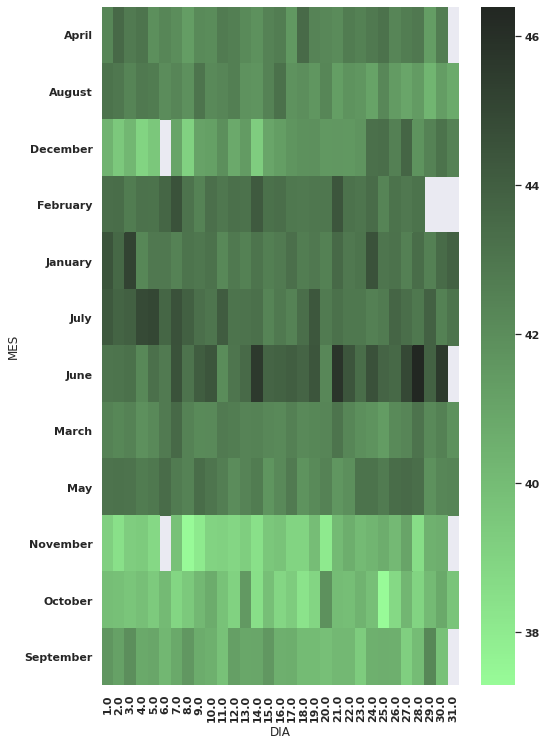

In [26]:
plt.figure(figsize=(8, 12))
pal = sns.dark_palette("palegreen", as_cmap=True, reverse=True)
sns.heatmap(heatmap1_data, cmap=pal)

In [27]:
test= test.sort_values(by = 'FECHA_RESULTADO')
test.tail()
#len(test)

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,POBLACION,MES,DIA
950928,20210531,7582de3ded56109d5f71a60b2161fcdd,LIMA,LIMA,ATE,AG,32.0,MASCULINO,NaT,9674755.0,NaN,NaN
950929,20210531,a04537345716d4e74a5346dd569a1809,LIMA,LIMA,SURQUILLO,AG,40.0,MASCULINO,NaT,9674755.0,NaN,NaN
950930,20210531,afb4e965061551c051fcc4069d03188d,LIMA,LIMA,CARABAYLLO,AG,42.0,MASCULINO,NaT,9674755.0,NaN,NaN
950931,20210531,52563fb0bd17dd3d781f4e1861f2ac61,LIMA,LIMA,PUENTE PIEDRA,AG,49.0,MASCULINO,NaT,9674755.0,NaN,NaN
950932,20210531,726c03ead9a70da75878d37ac38b9646,LIMA,LIMA,LIMA,AG,42.0,MASCULINO,NaT,9674755.0,NaN,NaN


In [28]:
bins = [0, 17, 59, 69, 80, 130]

rs = pd.cut(test['EDAD'], bins)
#rs

df = test.groupby(['DEPARTAMENTO',rs]).size().unstack()
df

EDAD,"(0, 17]","(17, 59]","(59, 69]","(69, 80]","(80, 130]"
DEPARTAMENTO,,,,,
AMAZONAS,2677,21287,2506,1382,668
ANCASH,3833,52132,7238,4616,1856
APURIMAC,1346,18105,1893,1188,579
AREQUIPA,3480,65264,8946,5006,2006
AYACUCHO,1403,22192,2819,1741,783
CAJAMARCA,3836,44317,5272,3412,1656
CALLAO,4412,71863,10539,5797,2385
CUSCO,2469,50458,5727,3036,1131
HUANCAVELICA,1054,11387,1167,743,283


<AxesSubplot:xlabel='METODODX', ylabel='count'>

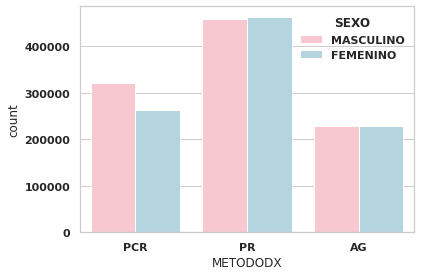

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='METODODX',hue='SEXO',data=test, palette=sns.color_palette(['pink', 'lightblue']))

In [34]:
salidasxsemanas = test.sort_values(by = 'FECHA_RESULTADO')
# start_date = "2021-01-01"
# end_date = "2021-05-26"

# after_start_date = salidasxsemanas["FECHA_RESULTADO"] >= start_date
# before_end_date = salidasxsemanas["FECHA_RESULTADO"] <= end_date
# between_two_dates = after_start_date & before_end_date
# filtered_dates = salidasxsemanas.loc[between_two_dates]

# filtered_dates

In [71]:
conteo_total_pruebas = filtered_dates.groupby("METODODX").size()
conteo_total_pruebas

METODODX
AG     436001
PCR    341708
PR     130431
dtype: int64

In [40]:
prueba = test.groupby(["METODODX","PROVINCIA", "DEPARTAMENTO", "POBLACION", pd.Grouper(key="FECHA_RESULTADO",freq="D")]).size()
prueba = prueba.reset_index()
prueba.rename(columns={0: 'CANTIDAD'}, inplace=True)
prueba

,METODODX,PROVINCIA,DEPARTAMENTO,POBLACION,FECHA_RESULTADO,CANTIDAD
0,AG,ABANCAY,APURIMAC,120116.0,2021-01-04,1
1,AG,ABANCAY,APURIMAC,120116.0,2021-01-05,3
2,AG,ABANCAY,APURIMAC,120116.0,2021-01-06,1
3,AG,ABANCAY,APURIMAC,120116.0,2021-01-07,2
4,AG,ABANCAY,APURIMAC,120116.0,2021-01-09,4
...,...,...,...,...,...,...
86752,PR,ZARUMILLA,TUMBES,56038.0,2021-05-11,1
86753,PR,ZARUMILLA,TUMBES,56038.0,2021-05-13,2
86754,PR,ZARUMILLA,TUMBES,56038.0,2021-05-16,3
86755,PR,ZARUMILLA,TUMBES,56038.0,2021-05-18,1


In [38]:
prueba.to_csv('dataset_pruebas_provincia.csv' , index=False)

In [41]:
agrupado1 = test.groupby(['PROVINCIA', 'SEXO']).agg(
                                  {'UUID': 'count'
                                  }).reset_index()


agrupado1

,PROVINCIA,SEXO,UUID
0,ABANCAY,FEMENINO,5374
1,ABANCAY,MASCULINO,5087
2,ACOBAMBA,FEMENINO,639
3,ACOBAMBA,MASCULINO,551
4,ACOMAYO,FEMENINO,225
...,...,...,...
387,YUNGAY,MASCULINO,581
388,YUNGUYO,FEMENINO,373
389,YUNGUYO,MASCULINO,363
390,ZARUMILLA,FEMENINO,1439


In [42]:
departamento = test['DEPARTAMENTO'] == 'LIMA REGION'
departamento_data = test[departamento]

bins = [0, 17, 30, 40, 60, 80, 100, 130]

rs = pd.cut(departamento_data['EDAD'], bins)
#rs
casos_provincia = departamento_data.groupby(['PROVINCIA',rs]).size().unstack() 
casos_provincia

EDAD,"(0, 17]","(17, 30]","(30, 40]","(40, 60]","(60, 80]","(80, 100]","(100, 130]"
PROVINCIA,,,,,,,
BARRANCA,435,1794,1769,3179,1754,303,0
CAJATAMBO,16,48,45,85,56,14,0
CANTA,58,168,160,256,122,24,0
CAÑETE,746,2318,2225,3227,1350,225,1
HUARAL,635,3219,3034,4826,2235,348,2
HUAROCHIRI,258,864,889,1336,521,77,0
HUAURA,856,3627,3519,5366,2504,439,5
OYON,19,86,101,108,59,9,0
YAUYOS,37,81,92,171,82,18,0


In [25]:
test['POBLACION_CIENMIL'] = test['POBLACION']/100000
test

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,POBLACION,POBLACION_CIENMIL
0,20210531,7320cabdc1aaca6c59014cae76a134e6,ANCASH,SANTA,NUEVO CHIMBOTE,PR,41.0,MASCULINO,2020-08-22,474053.0,4.74053
1,20210531,c1f091ccef4b8a7d2095366e3a12e2c4,LAMBAYEQUE,CHICLAYO,CHICLAYO,PR,42.0,MASCULINO,2020-08-22,862709.0,8.62709
2,20210531,9de277f4682e69b204c1683ed8c6edbd,ANCASH,HUARAZ,HUARAZ,PR,47.0,MASCULINO,2020-08-22,185276.0,1.85276
3,20210531,c029d5394b7d54a6a20bd956674bf070,LAMBAYEQUE,CHICLAYO,CHICLAYO,PR,47.0,MASCULINO,2020-08-21,862709.0,8.62709
4,20210531,0041207e579b0ffc4e8bb8a083efb20d,LAMBAYEQUE,CHICLAYO,CHICLAYO,PR,47.0,MASCULINO,2020-08-21,862709.0,8.62709
...,...,...,...,...,...,...,...,...,...,...,...
1961082,20210531,5ac08c40d8419e26ee678e296fff147b,CUSCO,CUSCO,SANTIAGO,PCR,16.0,MASCULINO,2021-01-12,511019.0,5.11019
1961083,20210531,f77b56ea0006f32f66158363920e2b50,CUSCO,QUISPICANCHI,OROPESA,PCR,16.0,MASCULINO,2021-01-15,101735.0,1.01735
1961084,20210531,5174190f88b9266cd2f0590004c74e50,CUSCO,LA CONVENCION,SANTA ANA,PCR,17.0,MASCULINO,2021-01-15,167910.0,1.67910
1961085,20210531,2b2e6e3bca7bb6837323b24ee7ae8435,CUSCO,CHUMBIVILCAS,SANTO TOMAS,PCR,19.0,MASCULINO,2021-01-10,70143.0,0.70143


In [ ]:
salidasxsemanas = test.sort_values(by = 'FECHA_RESULTADO')
start_date = "2020-12-29"
end_date = "2021-05-18"

after_start_date = salidasxsemanas["FECHA_RESULTADO"] >= start_date
before_end_date = salidasxsemanas["FECHA_RESULTADO"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = salidasxsemanas.loc[between_two_dates]

filtered_dates

In [ ]:
len(provincia)

In [ ]:
# df_provincia = pd.DataFrame(filtered_dates)

# for response in provincia:
#     provincia_data_select= df_provincia[(df_provincia['PROVINCIA']== response)].copy()
#     if not provincia_data_select.empty:
#         d = {'color': ["#b35806","#998ec3"]}
#         b_width = 5  # chose an arbitrary value here
#         my_bins = np.arange(min(provincia_data_select['EDAD']), max(provincia_data_select['EDAD']) + b_width, b_width)
#         grid = sns.FacetGrid(provincia_data_select, col="PROVINCIA",hue_kws=d, hue_order=['MASCULINO','FEMENINO'], margin_titles=True, size=5, aspect=.8, col_wrap=1, hue='SEXO')
#         draw = grid.map(plt.hist, 'EDAD', bins=my_bins, alpha=0.6).add_legend()
#         draw.savefig('img/marzo-mayo/'+ response + '.png')

In [26]:
weekly_sales = test.groupby(["SEXO","DEPARTAMENTO","PROVINCIA", "POBLACION", "POBLACION_CIENMIL", pd.Grouper(key="FECHA_RESULTADO",freq="W-MON")]).size()
weekly_sales = weekly_sales.unstack(0).fillna(0)
weekly_sales.sort_values(by=['FECHA_RESULTADO'], inplace=True, ascending=True)
weekly_sales.loc[:,'TOTAL'] = weekly_sales.sum(numeric_only=True, axis=1)
weekly_sales = weekly_sales.reset_index()
weekly_sales

SEXO,DEPARTAMENTO,PROVINCIA,POBLACION,POBLACION_CIENMIL,FECHA_RESULTADO,FEMENINO,MASCULINO,TOTAL
0,LIMA,LIMA,9674755.0,96.74755,2020-03-09,2.0,6.0,8.0
1,HUANUCO,HUANUCO,315799.0,3.15799,2020-03-09,1.0,1.0,2.0
2,AREQUIPA,AREQUIPA,1175765.0,11.75765,2020-03-09,0.0,1.0,1.0
3,CUSCO,CUSCO,511019.0,5.11019,2020-03-16,0.0,1.0,1.0
4,LAMBAYEQUE,CHICLAYO,862709.0,8.62709,2020-03-16,3.0,3.0,6.0
...,...,...,...,...,...,...,...,...
10906,SAN MARTIN,MARISCAL CACERES,73193.0,0.73193,2021-05-31,14.0,9.0,23.0
10907,CALLAO,CALLAO,1129854.0,11.29854,2021-05-31,174.0,155.0,329.0
10908,LA LIBERTAD,JULCAN,30987.0,0.30987,2021-05-31,4.0,2.0,6.0
10909,LA LIBERTAD,ASCOPE,123480.0,1.23480,2021-05-31,2.0,7.0,9.0


In [49]:
weekly_sales[['FEMENINO','MASCULINO', 'TOTAL']] = weekly_sales[['FEMENINO','MASCULINO', 'TOTAL']].div(weekly_sales['POBLACION_CIENMIL'].values,axis=0)
weekly_sales

SEXO,PROVINCIA,POBLACION,POBLACION_CIENMIL,FECHA_RESULTADO,FEMENINO,MASCULINO,TOTAL
0,AREQUIPA,1175765.0,11.75765,2020-03-09,0.000000,0.085051,0.085051
1,HUANUCO,315799.0,3.15799,2020-03-09,0.316657,0.316657,0.633314
2,LIMA,9674755.0,96.74755,2020-03-09,0.020672,0.062017,0.082689
3,AREQUIPA,1175765.0,11.75765,2020-03-16,0.085051,0.000000,0.085051
4,CHINCHA,262110.0,2.62110,2020-03-16,0.000000,0.381519,0.381519
...,...,...,...,...,...,...,...
10906,HUANCABAMBA,118533.0,1.18533,2021-05-31,28.683995,16.872938,45.556934
10907,HUANCANE,58957.0,0.58957,2021-05-31,10.176909,8.480757,18.657666
10908,ASCOPE,123480.0,1.23480,2021-05-31,1.619695,5.668934,7.288630
10909,HUANCAYO,595183.0,5.95183,2021-05-31,100.137269,83.671745,183.809013


In [50]:
weekly_sales.FEMENINO = weekly_sales.FEMENINO.round()
weekly_sales.MASCULINO = weekly_sales.MASCULINO.round()
weekly_sales.TOTAL = weekly_sales.TOTAL.round()
weekly_sales

SEXO,PROVINCIA,POBLACION,POBLACION_CIENMIL,FECHA_RESULTADO,FEMENINO,MASCULINO,TOTAL
0,AREQUIPA,1175765.0,11.75765,2020-03-09,0.0,0.0,0.0
1,HUANUCO,315799.0,3.15799,2020-03-09,0.0,0.0,1.0
2,LIMA,9674755.0,96.74755,2020-03-09,0.0,0.0,0.0
3,AREQUIPA,1175765.0,11.75765,2020-03-16,0.0,0.0,0.0
4,CHINCHA,262110.0,2.62110,2020-03-16,0.0,0.0,0.0
...,...,...,...,...,...,...,...
10906,HUANCABAMBA,118533.0,1.18533,2021-05-31,29.0,17.0,46.0
10907,HUANCANE,58957.0,0.58957,2021-05-31,10.0,8.0,19.0
10908,ASCOPE,123480.0,1.23480,2021-05-31,2.0,6.0,7.0
10909,HUANCAYO,595183.0,5.95183,2021-05-31,100.0,84.0,184.0


In [ ]:
#import matplotlib.ticker as plticker
#loc = plticker.MultipleLocator(base=7.0)
#plt.figure(figsize=(12, 6))
#flatui = ["#998ec3", "#b35806"]
#femenino = tasa_genero[tasa_genero.columns[0]].values
#masculino = tasa_genero[tasa_genero.columns[1]].values

#df = pd.DataFrame(np.c_[femenino, masculino], index= tasa_genero.index.droplevel(0))

#ax = sns.lineplot(data=df, palette=flatui)
#ax.legend(['Femenino', 'Masculino'])
#ax.xaxis.set_major_locator(loc)
#grid = ax.get_figure()
#grid.savefig('tasageneros_altoamazonas_semanas.png')

In [51]:
weekly_sales.to_csv('dataset_covid_total.csv' , index=False)

In [ ]:
weekly_sales.to_json('dataset_enero_mayo.json', orient="table")